In [272]:
import matplotlib.pyplot as plt
from scipy.special import expit
from pylab import *
from itertools import product
city =   0
drone =  1
rice = 2
couscous = 3
beer = 4
name_map = {city: 'city phone', drone: 'drone phone', rice: 'rice', couscous: 'couscous', beer: 'beer'}

# An embedding provided that gives similarities between products
Psi = array([[1.,0.5,0,0,0],[.1,1,0,0,0],[0,0,1,.1,0],[0,0,0.1,1,0],[0,.0,0,0,1]])
P, K = Psi.shape

Psi

array([[1. , 0.5, 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0. , 0. , 1. ]])

In [273]:
matmul(Psi,Psi.T)

array([[1.25, 0.6 , 0.  , 0.  , 0.  ],
       [0.6 , 1.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.01, 0.2 , 0.  ],
       [0.  , 0.  , 0.2 , 1.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ]])

In [294]:
P = 5 # number of products


data = [{'a': city, 'h': [city], 'I': 1000, 'C': 10},
        {'a': drone, 'h': [city], 'I': 1000, 'C': 20},
        {'a': rice, 'h': [city], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [city], 'I': 0, 'C': 0},
        {'a': beer, 'h': [city], 'I': 0, 'C': 0},        
        {'a': city, 'h': [drone], 'I': 1000, 'C': 10},
        {'a': drone, 'h': [drone], 'I': 1000, 'C': 10},
        {'a': rice, 'h': [drone], 'I': 0, 'C': 0},                          
        {'a': couscous, 'h': [drone], 'I': 0, 'C': 0},
        {'a': beer, 'h': [drone], 'I': 0, 'C': 0},
        {'a': city, 'h': [rice], 'I': 0, 'C': 0},
        {'a': drone, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 1000, 'C': 10},        
        {'a': couscous, 'h': [rice], 'I': 1000, 'C': 20},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': city, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': drone, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': rice, 'h': [couscous], 'I': 1000, 'C': 20},        
        {'a': couscous, 'h': [couscous], 'I': 1000, 'C': 10},
        {'a': beer, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': city, 'h': [beer], 'I': 0, 'C': 0},
        {'a': drone, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 1000, 'C': 20}]


# unlucky in the sense that we get 1/1 click when h=beer and a=city
data_unlucky = [{'a': city, 'h': [city], 'I': 1000, 'C': 10},
        {'a': drone, 'h': [city], 'I': 1000, 'C': 20},
        {'a': rice, 'h': [city], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [city], 'I': 0, 'C': 0},
        {'a': beer, 'h': [city], 'I': 0, 'C': 0},        
        {'a': city, 'h': [drone], 'I': 1000, 'C': 10},
        {'a': drone, 'h': [drone], 'I': 1000, 'C': 10},
        {'a': rice, 'h': [drone], 'I': 0, 'C': 0},                          
        {'a': couscous, 'h': [drone], 'I': 0, 'C': 0},
        {'a': beer, 'h': [drone], 'I': 0, 'C': 0},
        {'a': city, 'h': [rice], 'I': 0, 'C': 0},
        {'a': drone, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 1000, 'C': 10},        
        {'a': couscous, 'h': [rice], 'I': 1000, 'C': 20},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': city, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': drone, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': rice, 'h': [couscous], 'I': 1000, 'C': 20},        
        {'a': couscous, 'h': [couscous], 'I': 1000, 'C': 10},
        {'a': beer, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': city, 'h': [beer], 'I': 1, 'C': 1},
        {'a': drone, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 1000, 'C': 20}]


data_empty = [{'a': city, 'h': [city], 'I': 0, 'C': 0},
        {'a': drone, 'h': [city], 'I': 0, 'C': 0},
        {'a': rice, 'h': [city], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [city], 'I': 0, 'C': 0},
        {'a': beer, 'h': [city], 'I': 0, 'C': 0},        
        {'a': city, 'h': [drone], 'I': 0, 'C': 0},
        {'a': drone, 'h': [drone], 'I': 0, 'C': 0},
        {'a': rice, 'h': [drone], 'I': 0, 'C': 0},                          
        {'a': couscous, 'h': [drone], 'I': 0, 'C': 0},
        {'a': beer, 'h': [drone], 'I': 0, 'C': 0},
        {'a': city, 'h': [rice], 'I': 0, 'C': 0},
        {'a': drone, 'h': [rice], 'I': 0, 'C': 0},
        {'a': rice, 'h': [rice], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [rice], 'I': 0, 'C': 0},
        {'a': beer, 'h': [rice], 'I': 0, 'C': 0},
        {'a': city, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': drone, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': rice, 'h': [couscous], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': beer, 'h': [couscous], 'I': 0, 'C': 0},
        {'a': city, 'h': [beer], 'I': 0, 'C': 0},
        {'a': drone, 'h': [beer], 'I': 0, 'C': 0},
        {'a': rice, 'h': [beer], 'I': 0, 'C': 0},        
        {'a': couscous, 'h': [beer], 'I': 0, 'C': 0},
        {'a': beer, 'h': [beer], 'I': 0, 'C': 0}]

In [275]:
data

[{'a': 0, 'h': [0], 'I': 1000, 'C': 10},
 {'a': 1, 'h': [0], 'I': 1000, 'C': 20},
 {'a': 2, 'h': [0], 'I': 0, 'C': 0},
 {'a': 3, 'h': [0], 'I': 0, 'C': 0},
 {'a': 4, 'h': [0], 'I': 0, 'C': 0},
 {'a': 0, 'h': [1], 'I': 1000, 'C': 10},
 {'a': 1, 'h': [1], 'I': 1000, 'C': 10},
 {'a': 2, 'h': [1], 'I': 0, 'C': 0},
 {'a': 3, 'h': [1], 'I': 0, 'C': 0},
 {'a': 4, 'h': [1], 'I': 0, 'C': 0},
 {'a': 0, 'h': [2], 'I': 0, 'C': 0},
 {'a': 1, 'h': [2], 'I': 0, 'C': 0},
 {'a': 2, 'h': [2], 'I': 1000, 'C': 10},
 {'a': 3, 'h': [2], 'I': 1000, 'C': 20},
 {'a': 4, 'h': [2], 'I': 0, 'C': 0},
 {'a': 0, 'h': [3], 'I': 0, 'C': 0},
 {'a': 1, 'h': [3], 'I': 0, 'C': 0},
 {'a': 2, 'h': [3], 'I': 1000, 'C': 20},
 {'a': 3, 'h': [3], 'I': 1000, 'C': 10},
 {'a': 4, 'h': [3], 'I': 0, 'C': 0},
 {'a': 0, 'h': [4], 'I': 0, 'C': 0},
 {'a': 1, 'h': [4], 'I': 0, 'C': 0},
 {'a': 2, 'h': [4], 'I': 0, 'C': 0},
 {'a': 3, 'h': [4], 'I': 0, 'C': 0},
 {'a': 4, 'h': [4], 'I': 1000, 'C': 20}]

In [276]:
def expand_data_binomial(d):
    a = d['a']
    omega = vstack([Psi[h,:] for h in d['h']]).mean(0)
    c = d['C']
    i = d['I']
    return omega, a, c, i

In [338]:
def do_plot(s):
    med = s['ctr'].mean(0).flatten()
    low = med - percentile(s['ctr'],2.5,axis=0).flatten()
    up = percentile(s['ctr'],97.5,axis=0).flatten() - med


    xnames = ['h=' + h+' a='+a for h,a in product(name_map.values(),name_map.values())]
    figure(figsize=(10,8))

    errorbar(xnames,y=med.flatten(),yerr=vstack((low,up)),fmt='.',ecolor='rrrrrgggggmmmmmccccckkkkk')
    plot(xnames,med.flatten(),'go')
    _ = xticks(rotation=90)

    plot(xnames,(click)/(impres),'x')

    
def print_best_rec(s):
    best_rec = s['ctr'].mean(0).argmax(1)

    for ii in range(P):
        print('when hist is ' + list(name_map.values())[ii] + ' recommend ' + list(name_map.values())[best_rec[ii]])

In [339]:
import pystan


script = """
data {
  int P;
  int N;
  int K;
  int click[N];
  int impres[N];  
  int a[N];
  vector[K] omega[N];
  matrix[P,K] Psi;
  real w1;
  real w2;
}

parameters {
  matrix[K,K] eps;
  real offset;
  real rho[P];
} transformed parameters{
  matrix[P,K] beta;
  
  beta = w1 * Psi + w2 * Psi * eps;
}

model {
  rho ~ normal(0, 0.1);
  offset ~ normal(-8,2);
  for (k in 1:K) {
    eps[k] ~ normal(0, 1);
  }
  for (n in 1:N) {
    click[n] ~ binomial_logit(impres[n],  dot_product(omega[n], beta[a[n],:]) + offset + rho[a[n]]);
  }
} generated quantities {
  matrix[P,P] ctr;
  for (p in 1:P) {
     ctr = inv_logit(Psi * beta' + offset + rho[p]);
  }
}
"""

model = pystan.StanModel(model_code=script)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_db65b353cae582ef7639d53ee6044e5e NOW.


Let's try the model using only the organic embeddings and no bandit data

In [340]:
# fit to the empty data set
flat_data = vstack([hstack(expand_data_binomial(d)) for d in data_empty])
omega = flat_data[:,0:K]
action = array(flat_data[:,K],dtype=int)
click = array(flat_data[:,K+1],dtype=int)
impres = array(flat_data[:,K+2],dtype=int)

N = omega.shape[0]
fit=model.sampling(data={'w1': 1., 'w2': .5, 'click': click, 'impres': impres, 'N': N, 'P': P, 'a': action+1, 'K': K, 'Psi': Psi, 'omega': omega})
s = fit.extract()

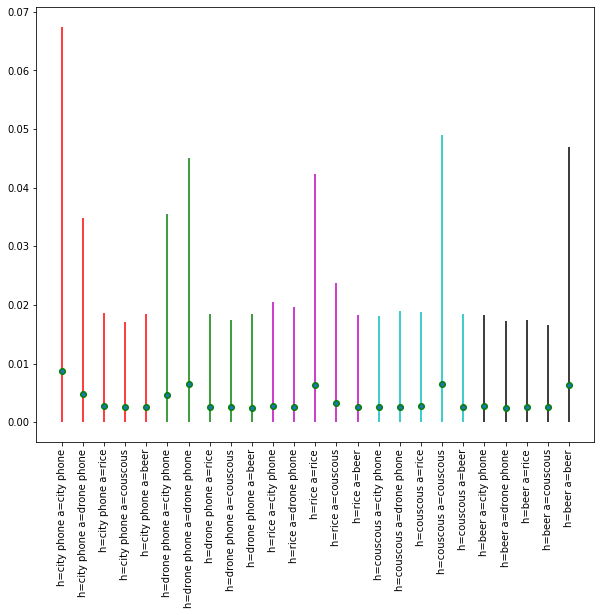

In [341]:
do_plot(s)

In [342]:
print_best_rec(s)

when hist is city phone recommend city phone
when hist is drone phone recommend drone phone
when hist is rice recommend rice
when hist is couscous recommend couscous
when hist is beer recommend beer


Now let's see if we get an advantage by using the bandit signal

In [343]:
flat_data = vstack([hstack(expand_data_binomial(d)) for d in data])
omega = flat_data[:,0:K]
action = array(flat_data[:,K],dtype=int)
click = array(flat_data[:,K+1],dtype=int)
impres = array(flat_data[:,K+2],dtype=int)

N = omega.shape[0]
fit=model.sampling(data={'w1': 1., 'w2': .5, 'click': click, 'impres': impres, 'N': N, 'P': P, 'a': action+1, 'K': K, 'Psi': Psi, 'omega': omega})
s = fit.extract()

In [344]:
omega

array([[1. , 0.5, 0. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 0. ],
       [1. , 0.5, 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. ]])

In [345]:
Psi

array([[1. , 0.5, 0. , 0. , 0. ],
       [0.1, 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0.1, 0. ],
       [0. , 0. , 0.1, 1. , 0. ],
       [0. , 0. , 0. , 0. , 1. ]])

In [346]:
action

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4])

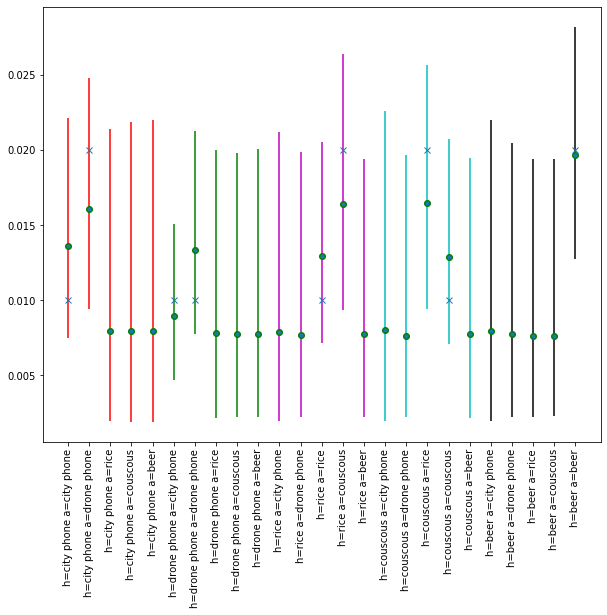

In [347]:
do_plot(s)

In [348]:
print_best_rec(s)

when hist is city phone recommend drone phone
when hist is drone phone recommend drone phone
when hist is rice recommend couscous
when hist is couscous recommend rice
when hist is beer recommend beer


In [349]:
s['beta'].mean(0)

array([[ 5.89387942e-01,  2.03171013e-01, -1.58208296e-04,
        -2.02576606e-03,  4.62290168e-03],
       [ 5.56494149e-01,  6.20540073e-01, -2.15638392e-03,
        -7.77683884e-03, -1.48289830e-03],
       [-1.00325975e-02,  1.02344360e-02,  5.58135096e-01,
         8.36018505e-01, -6.37191044e-03],
       [-1.05851799e-03, -1.48730767e-03,  8.32166545e-01,
         5.56179754e-01, -6.54396408e-03],
       [-5.33803573e-03,  3.94383046e-03,  8.06728823e-03,
         2.46213989e-03,  1.08446023e+00]])

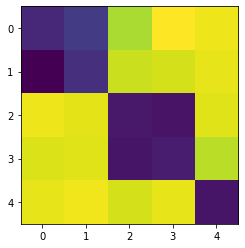

In [350]:
imshow(s['eps'].std(0))

In [351]:
s['eps'].mean(0)

array([[-1.34496659e+00, -2.25471630e-01,  1.93680771e-03,
         3.92137550e-03,  1.12933702e-02],
       [ 1.04748496e+00, -7.36372690e-01, -4.50644861e-03,
        -1.59458152e-02, -4.09513362e-03],
       [-2.00540318e-02,  2.09760946e-02, -1.04056881e+00,
         1.57656673e+00, -1.15505334e-02],
       [-1.11632815e-04, -5.07222480e-03,  1.56838997e+00,
        -1.04529716e+00, -1.19328748e-02],
       [-1.06760715e-02,  7.88766092e-03,  1.61345765e-02,
         4.92427978e-03,  1.68920466e-01]])

In [352]:
percentile(s['ctr'],50,axis=0).flatten()



array([0.01315499, 0.01565424, 0.00659663, 0.00662353, 0.00659238,
       0.00856248, 0.01301041, 0.00660026, 0.00658529, 0.006606  ,
       0.00663931, 0.00660368, 0.01257981, 0.01596818, 0.006657  ,
       0.00657613, 0.00652991, 0.01609873, 0.01247901, 0.00666108,
       0.0066999 , 0.00653875, 0.00656142, 0.00655246, 0.01938878])

In [353]:
s['ctr'].mean(0)

array([[0.01359939, 0.0160602 , 0.00796129, 0.00798125, 0.00794511],
       [0.00894887, 0.01333716, 0.00783742, 0.00773378, 0.00776053],
       [0.00792146, 0.00769193, 0.01292846, 0.0164434 , 0.00775082],
       [0.00802039, 0.00764824, 0.01648802, 0.01290713, 0.00774781],
       [0.00798996, 0.00773889, 0.00765946, 0.00764434, 0.01969873]])

In [354]:
# fit to the unlucky data set
flat_data = vstack([hstack(expand_data_binomial(d)) for d in data_unlucky])
omega = flat_data[:,0:K]
action = array(flat_data[:,K],dtype=int)
click = array(flat_data[:,K+1],dtype=int)
impres = array(flat_data[:,K+2],dtype=int)

N = omega.shape[0]
fit=model.sampling(data={'w1': 1., 'w2': .5, 'click': click, 'impres': impres, 'N': N, 'P': P, 'a': action+1, 'K': K, 'Psi': Psi, 'omega': omega})
s = fit.extract()

(0, 0.04)

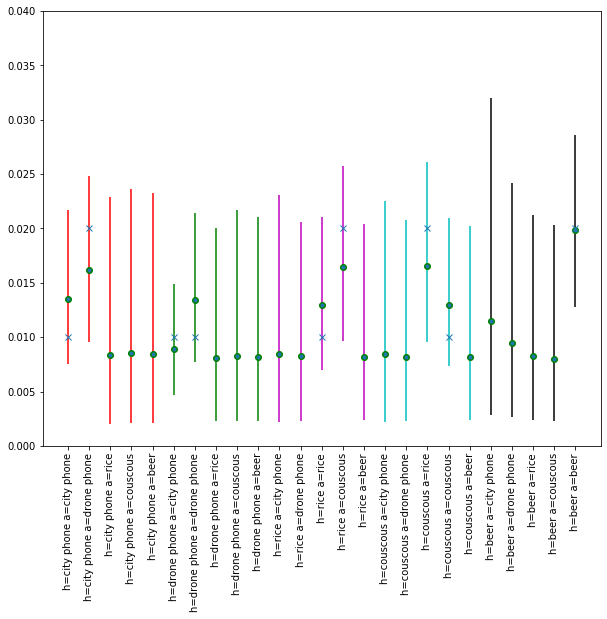

In [355]:
do_plot(s)
ylim([0,0.04])

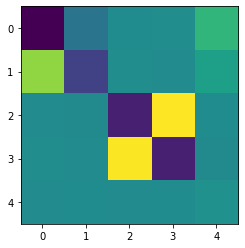

In [356]:
imshow(s['eps'].mean(0))

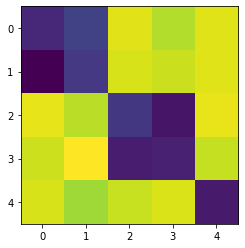

In [357]:
imshow(s['eps'].std(0))

(0, 0.04)

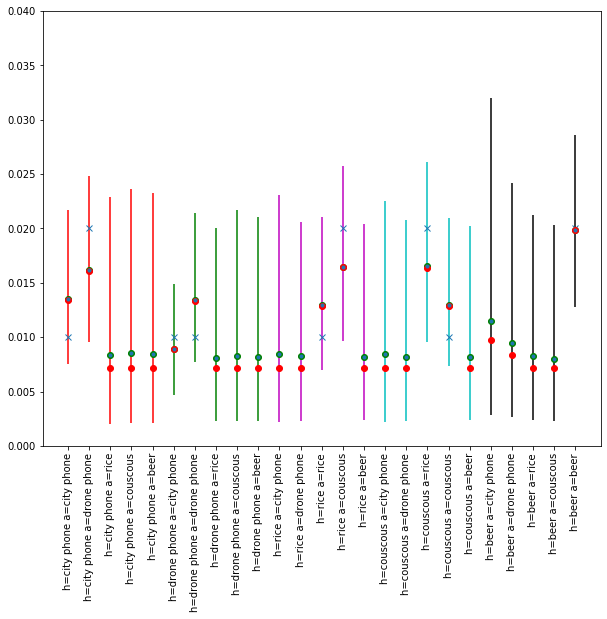

In [358]:
# maximum likelihood also works quite well..  

gg = model.optimizing(data={'w1': 1., 'w2': .5, 'click': click, 'impres': impres, 'N': N, 'P': P, 'a': action+1, 'K': K, 'Psi': Psi, 'omega': omega})
xnames = ['h=' + h+' a='+a for h,a in product(name_map.values(),name_map.values())]


do_plot(s)
plot(xnames,gg['ctr'].flatten(),'ro')

ylim([0,0.04])